In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [51]:
# import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/tmp/data',one_hot=False)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [52]:
# Visualize decoder setting
# parmeters
learning_rate = 0.01
traininf_epochs = 5
batch_size = 256
display_step = 1
examples_to_show = 10

In [53]:
# Network Parameters
n_input = 784 #28*28

In [54]:
X = tf.placeholder('float',[None,n_input])

In [55]:
# hidden layer settings
n_hidden_1 = 256
n_hidden_2 = 128
weights = {
    'encoder_h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'encoder_h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    
    'decoder_h1':tf.Variable(tf.random_normal([n_hidden_2,n_hidden_1])),
    'decoder_h2':tf.Variable(tf.random_normal([n_hidden_1,n_input])),
}
biases = {
    'encoder_b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2':tf.Variable(tf.random_normal([n_hidden_2])),
    
    'decoder_b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2':tf.Variable(tf.random_normal([n_input])),
}

In [56]:
# Bulding the encoder
def encoder(x):
    layer1 = tf.nn.sigmoid(tf.add(tf.matmul(x,weights['encoder_h1']),
                                  biases['encoder_b1']))
    # decoder hidden layer with sigmoid activation
    layer2 = tf.nn.sigmoid(tf.add(tf.matmul(layer1,weights['encoder_h2']),
                                  biases['encoder_b2']))
    return layer2

In [57]:
# Bulding the decoder 和上面对应
def decoder(x):
    layer1 = tf.nn.sigmoid(tf.add(tf.matmul(x,weights['decoder_h1']),
                                  biases['decoder_b1']))
    # decoder hidden layer with sigmoid activation
    layer2 = tf.nn.sigmoid(tf.add(tf.matmul(layer1,weights['decoder_h2']),
                                  biases['decoder_b2']))

    return layer2

In [58]:
# Construct model
encoder_op = encoder(X)

In [59]:
decoder_op = decoder(encoder_op)

In [60]:
# Prediction
y_pred = decoder_op
# Target(Labels) are the input data
y_true = X

In [61]:
# Define loss and optimizer, minimize the squared error
cost = tf.reduce_mean(tf.pow(y_true - y_pred,2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [62]:
# Initlize the variables
init = tf.global_variables_initializer()

Epoch: 0001 cost= 0.08555616438388824:.9f
Epoch: 0002 cost= 0.06948605179786682:.9f
Epoch: 0003 cost= 0.06698155403137207:.9f
Epoch: 0004 cost= 0.06378602981567383:.9f
Epoch: 0005 cost= 0.06573761254549026:.9f
Epoch: 0006 cost= 0.06212293729186058:.9f
Epoch: 0007 cost= 0.05925093591213226:.9f
Epoch: 0008 cost= 0.05991828069090843:.9f
Epoch: 0009 cost= 0.05707183852791786:.9f
Epoch: 0010 cost= 0.05430823564529419:.9f
Epoch: 0011 cost= 0.053342875093221664:.9f
Epoch: 0012 cost= 0.053430039435625076:.9f
Epoch: 0013 cost= 0.05141478031873703:.9f
Epoch: 0014 cost= 0.051711685955524445:.9f
Epoch: 0015 cost= 0.05126321688294411:.9f
Epoch: 0016 cost= 0.05033402144908905:.9f
Epoch: 0017 cost= 0.04901277646422386:.9f
Epoch: 0018 cost= 0.04885540157556534:.9f
Epoch: 0019 cost= 0.05071593448519707:.9f
Epoch: 0020 cost= 0.047041308134794235:.9f
Epoch: 0021 cost= 0.04811530560255051:.9f
Epoch: 0022 cost= 0.04678879678249359:.9f
Epoch: 0023 cost= 0.0474524088203907:.9f
Epoch: 0024 cost= 0.04544489085

Epoch: 0196 cost= 0.03834148123860359:.9f
Epoch: 0197 cost= 0.03665713220834732:.9f
Epoch: 0198 cost= 0.03659684211015701:.9f
Epoch: 0199 cost= 0.03768690675497055:.9f
Epoch: 0200 cost= 0.0342412143945694:.9f
Epoch: 0201 cost= 0.038444675505161285:.9f
Epoch: 0202 cost= 0.03545043244957924:.9f
Epoch: 0203 cost= 0.037397634238004684:.9f
Epoch: 0204 cost= 0.03622794151306152:.9f
Epoch: 0205 cost= 0.03789278119802475:.9f
Epoch: 0206 cost= 0.03857757896184921:.9f
Epoch: 0207 cost= 0.03838914632797241:.9f
Epoch: 0208 cost= 0.03789152577519417:.9f
Epoch: 0209 cost= 0.03533784672617912:.9f
Epoch: 0210 cost= 0.03593160957098007:.9f
Epoch: 0211 cost= 0.03858543187379837:.9f
Epoch: 0212 cost= 0.03919404745101929:.9f
Epoch: 0213 cost= 0.03843194618821144:.9f
Epoch: 0214 cost= 0.035388823598623276:.9f
Optimizeation Finished!


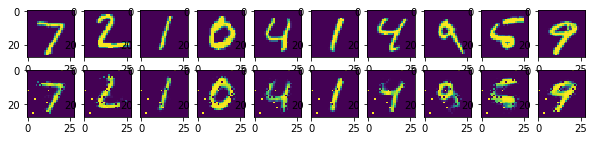

In [64]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    total_batch = int(mnist.train.num_examples/batch_size)   
    
    # Training cycle
    for epoch in range(total_batch):
        # loop over all batches
        for i in range(total_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size) #
        # Run optimization op (backprop) and cost op (to get loss value)
            _, c =sess.run([optimizer,cost],feed_dict={X:batch_xs})
    #Display logs per epoch step
        if epoch % display_step == 0:
            print('Epoch:','%04d' %(epoch+1),'cost=',"{:.9f}".format(c))
        
    print('Optimizeation Finished!')
    
    # Applying encode and decode over test set
    encode_decode = sess.run(
        y_pred, feed_dict={X:mnist.test.images[:examples_to_show]})
    
    # Compare original images with their reconstructions
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(examples_to_show):
        a[0][i].imshow(np.reshape(mnist.test.images[i],(28,28)))
        a[1][i].imshow(np.reshape(encode_decode[i],(28,28)))
    plt.show()